In [1]:
import pandas as pd

In [9]:
data = pd.read_csv('AirPassengers.csv')
data.shape, data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


((144, 2),
 None,
      Month  #Passengers
 0  1949-01          112
 1  1949-02          118
 2  1949-03          132
 3  1949-04          129
 4  1949-05          121)

In [10]:
# Проверка на пропуски
missing_values = data.isnull().sum()
print("Пропуски в данных:\n", missing_values)

# Проверка на дубликаты
duplicates = data.duplicated().sum()
print("Количество дубликатов в данных:", duplicates)

Пропуски в данных:
 Month          0
#Passengers    0
dtype: int64
Количество дубликатов в данных: 0


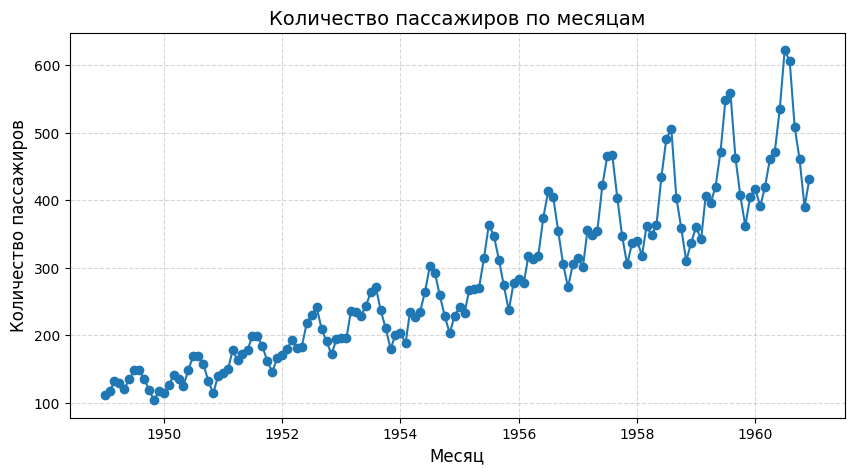

In [11]:

import matplotlib.pyplot as plt

data["Month"] = pd.to_datetime(data["Month"])

# Визуализация временного ряда
plt.figure(figsize=(10, 5))
plt.plot(data["Month"], data["#Passengers"], marker="o")
plt.title("Количество пассажиров по месяцам", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Количество пассажиров", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()


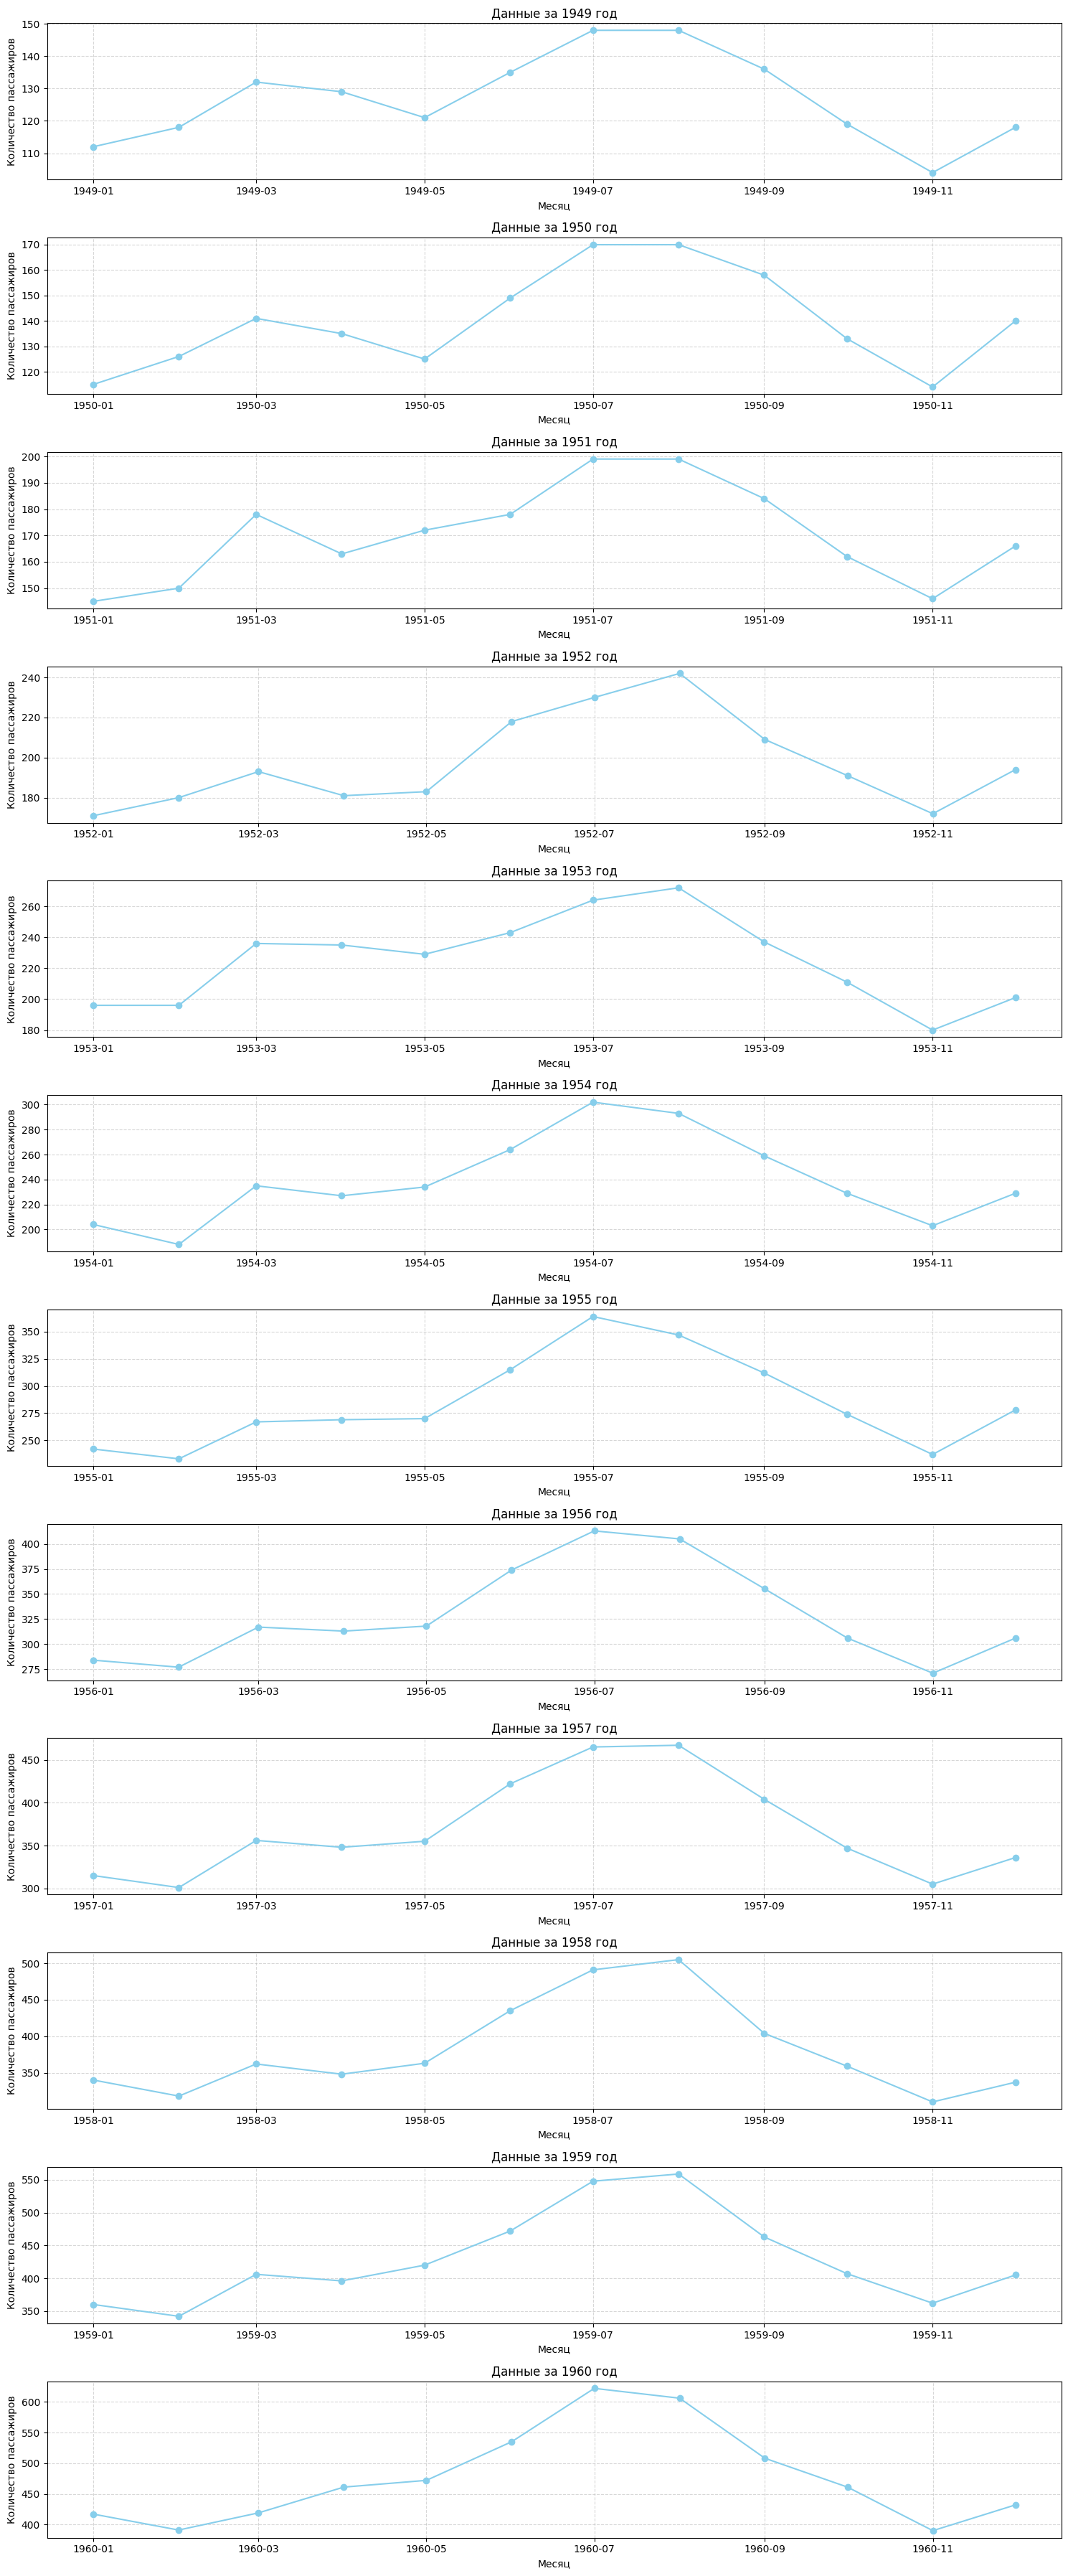

In [18]:
# Извлечение уникальных лет из данных
unique_years = data["Month"].dt.year.unique()

# Создание графиков с несколькими подграфиками
plt.figure(figsize=(15, len(unique_years) * 3))  # Размер полотна адаптируется под количество лет

for i, year in enumerate(unique_years, 1):
    plt.subplot(len(unique_years), 1, i)  # Создаём подграфик
    yearly_data = data[data["Month"].dt.year == year]
    plt.plot(yearly_data["Month"], yearly_data["#Passengers"], marker="o", color="skyblue")
    plt.title(f"Данные за {year} год", fontsize=12)
    plt.xlabel("Месяц", fontsize=10)
    plt.ylabel("Количество пассажиров", fontsize=10)
    plt.grid(visible=True, linestyle="--", alpha=0.5)

plt.tight_layout()  # Подгонка графиков
plt.show()

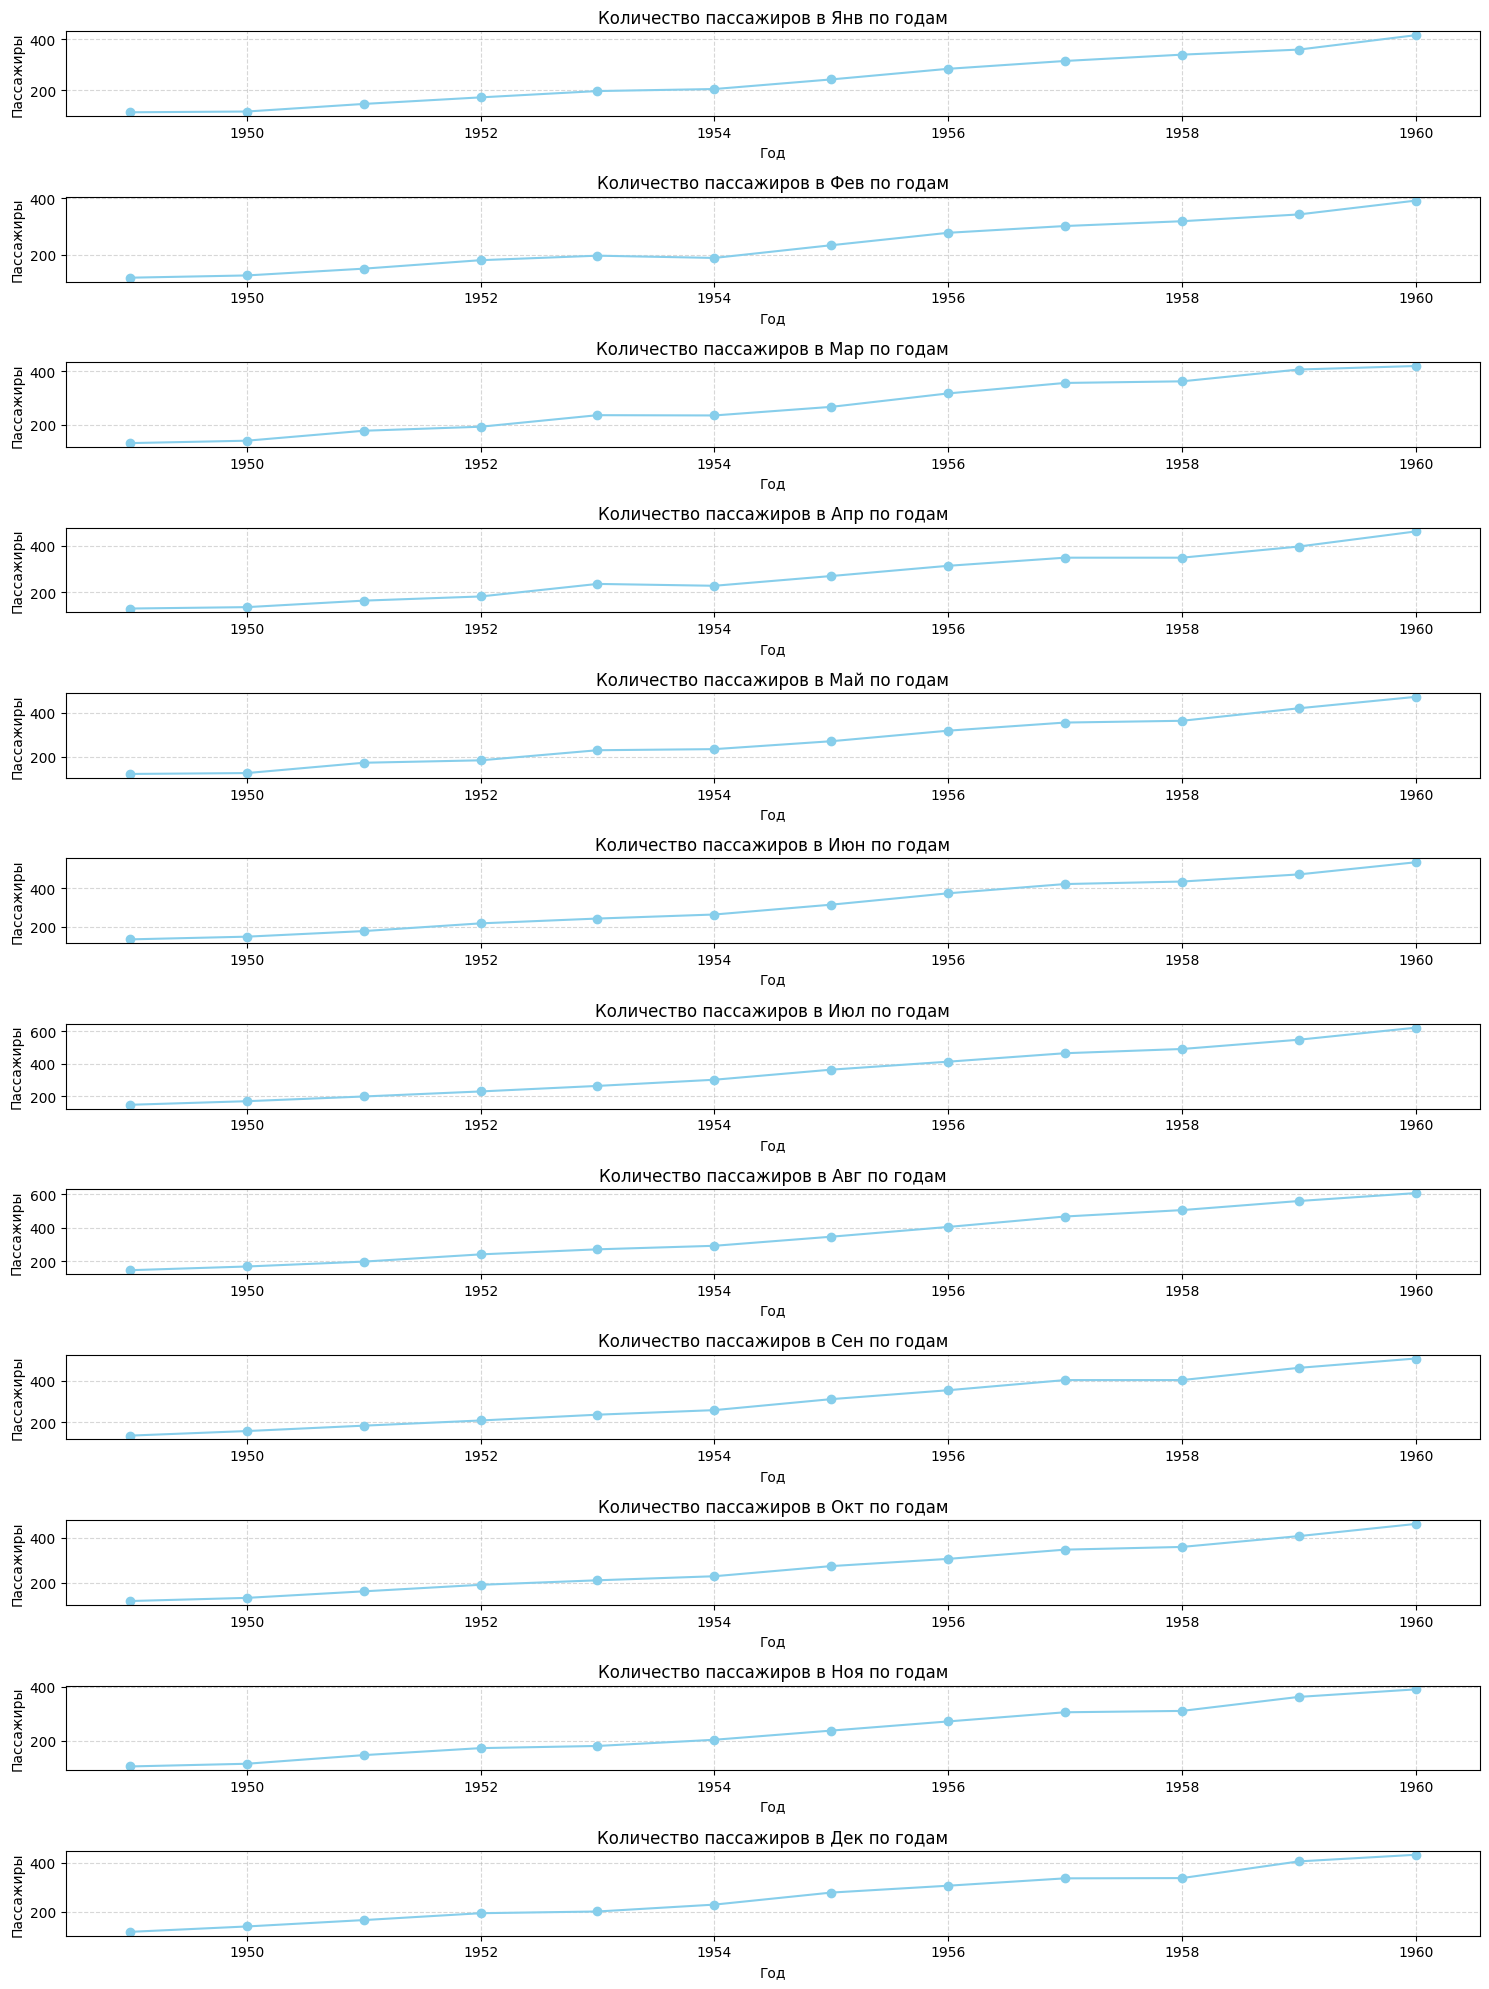

In [29]:
# Создание полотна для визуализации каждого месяца на отдельной линии времени
plt.figure(figsize=(15, 20))
months = ["Янв", "Фев", "Мар", "Апр", "Май", "Июн", "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"]

for month in range(1, 13):
    plt.subplot(12, 1, month)
    month_data = data[data["Month_Num"] == month]
    plt.plot(month_data["Year"], month_data["#Passengers"], marker="o", color="skyblue")
    plt.title(f"Количество пассажиров в {months[month-1]} по годам", fontsize=12)
    plt.xlabel("Год", fontsize=10)
    plt.ylabel("Пассажиры", fontsize=10)
    plt.grid(visible=True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

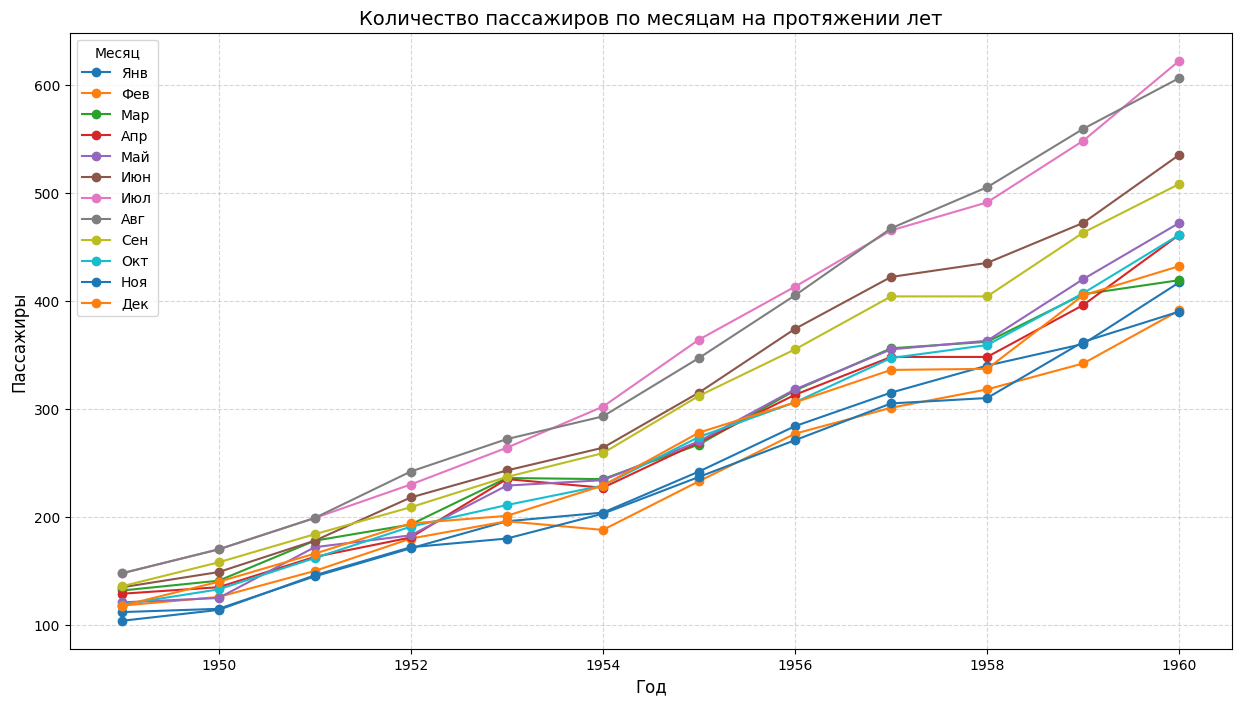

In [30]:
# Создание графика с 12 линиями, по одной для каждого месяца
plt.figure(figsize=(15, 8))
months = ["Янв", "Фев", "Мар", "Апр", "Май", "Июн", "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"]

for month in range(1, 13):
    month_data = data[data["Month_Num"] == month]
    plt.plot(month_data["Year"], month_data["#Passengers"], marker="o", label=months[month-1])

plt.title("Количество пассажиров по месяцам на протяжении лет", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Пассажиры", fontsize=12)
plt.legend(title="Месяц")
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()

In [12]:
# Определение временного промежутка
start_date = data["Month"].min()
end_date = data["Month"].max()

print("Начало данных:", start_date)
print("Окончание данных:", end_date)
print("Временной промежуток:", end_date - start_date)

Начало данных: 1949-01-01 00:00:00
Окончание данных: 1960-12-01 00:00:00
Временной промежуток: 4352 days 00:00:00


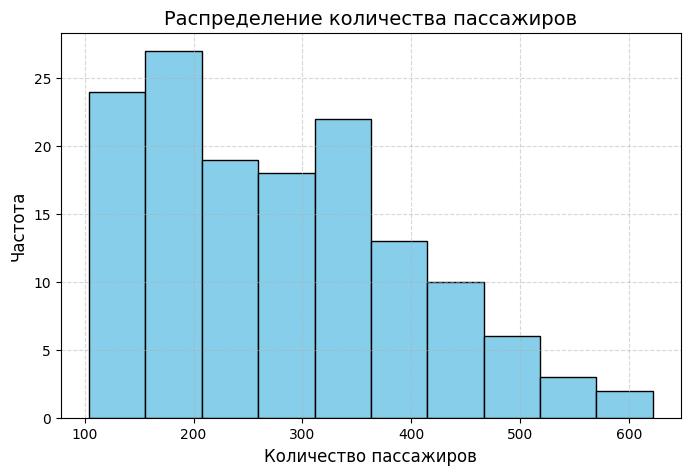

In [13]:
plt.figure(figsize=(8, 5))
plt.hist(data["#Passengers"], bins=10, color="skyblue", edgecolor="black")
plt.title("Распределение количества пассажиров", fontsize=14)
plt.xlabel("Количество пассажиров", fontsize=12)
plt.ylabel("Частота", fontsize=12)
plt.grid(visible=True, linestyle="--", alpha=0.5)
plt.show()


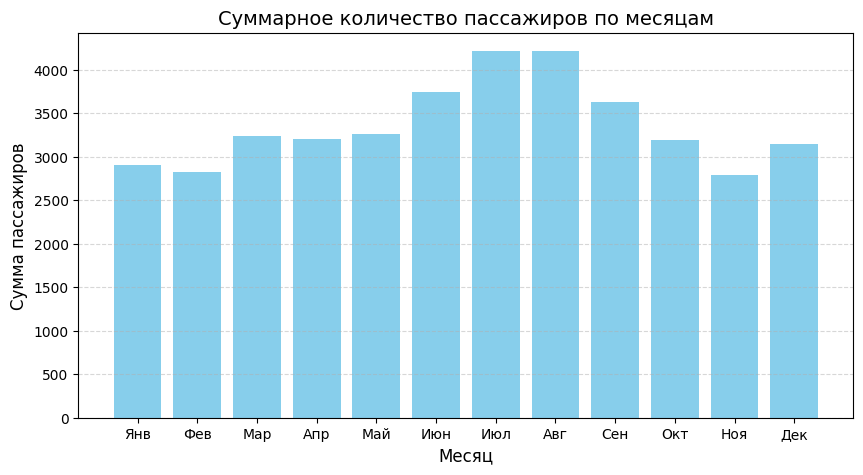

In [14]:

# Извлечение месяца из даты и группировка данных по месяцам
data["Month_Num"] = data["Month"].dt.month
monthly_sum = data.groupby("Month_Num")["#Passengers"].sum()

# Код для построения столбчатой диаграммы
plt.figure(figsize=(10, 5))
plt.bar(monthly_sum.index, monthly_sum.values, color="skyblue")
plt.title("Суммарное количество пассажиров по месяцам", fontsize=14)
plt.xlabel("Месяц", fontsize=12)
plt.ylabel("Сумма пассажиров", fontsize=12)
plt.xticks(monthly_sum.index, ["Янв", "Фев", "Мар", "Апр", "Май", "Июн", "Июл", "Авг", "Сен", "Окт", "Ноя", "Дек"])
plt.grid(axis="y", linestyle="--", alpha=0.5)


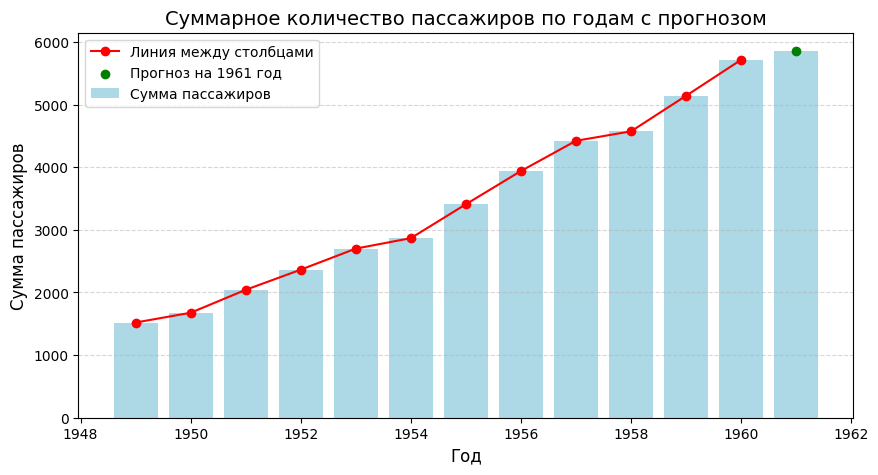

In [26]:
# Группировка данных по годам и вычисление суммы пассажиров за каждый год
data["Year"] = data["Month"].dt.year
yearly_sum = data.groupby("Year")["#Passengers"].sum()

# Подготовка данных для линейной регрессии
X = yearly_sum.index.values.reshape(-1, 1)  # Годы
y = yearly_sum.values  # Суммарное количество пассажиров

# Построение модели линейной регрессии
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов a и b
a = model.coef_[0]
b = model.intercept_

# Прогноз на следующий год
next_year = X[-1][0] + 1
forecast = a * next_year + b

# Обновление данных для визуализации
yearly_sum[next_year] = forecast  # Добавляем прогноз в данные

# Визуализация с прогнозом
plt.figure(figsize=(10, 5))
plt.bar(yearly_sum.index, yearly_sum.values, color="lightblue", label="Сумма пассажиров")
plt.plot(yearly_sum.index[:-1], yearly_sum.values[:-1], color="red", marker="o", label="Линия между столбцами")
plt.scatter(next_year, forecast, color="green", label=f"Прогноз на {next_year} год")
plt.title("Суммарное количество пассажиров по годам с прогнозом", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Сумма пассажиров", fontsize=12)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

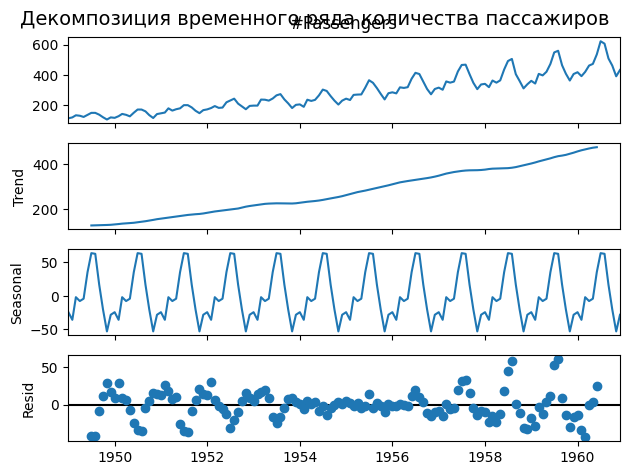

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Преобразование данных
data.set_index("Month", inplace=True)

# Декомпозиция временного ряда
decomposition = seasonal_decompose(data["#Passengers"], model="additive", period=12)

# Визуализация декомпозиции
decomposition.plot()
plt.suptitle("Декомпозиция временного ряда количества пассажиров", fontsize=14)
plt.show()
